In [1]:
import os, random
import fastbook
from fastbook import *
from fastai.vision.widgets import *

In [2]:
path = "/Users/egoitzcarral/caras_images"
os.chdir(path)  

In [3]:
caras = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.15, seed=123),
    get_y=parent_label
)

In [4]:
dls = caras.dataloaders(path)

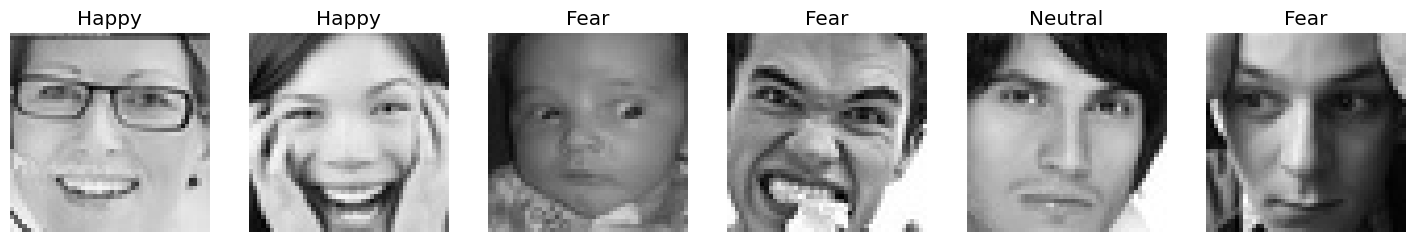

In [5]:
dls.valid.show_batch(max_n=6, nrows=1)

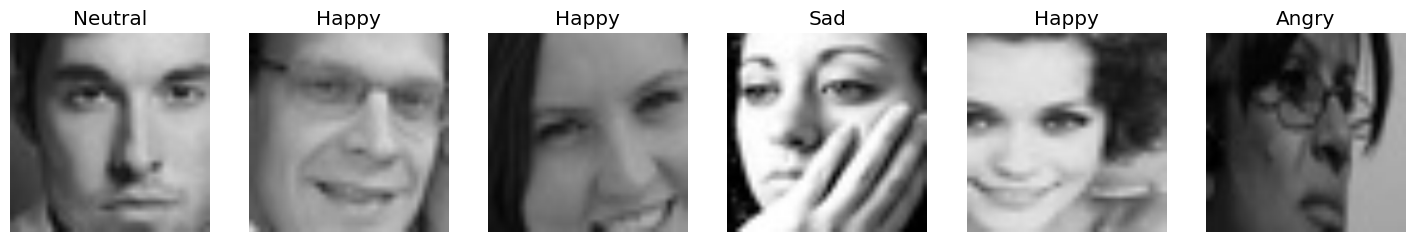

In [7]:
#caras = caras.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
caras = caras.new(item_tfms=RandomResizedCrop(224, min_scale=0.5))
dls = caras.dataloaders(path)
dls.train.show_batch(max_n=6, nrows=1)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(5)

## References

Howard, J., & Gugger, S. (2020). _Deep Learning for Coders with Fastai and Pytorch: AI Applications Without a PhD_. O’Reilly Media, Incorporated. https://books.google.no/books?id=xd6LxgEACAAJ

Manas Sambare (2020). _FER-2013_. https://www.kaggle.com/datasets/msambare/fer2013